In [438]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [439]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [440]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [441]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)

In [442]:
x_train_flatten = x_train_flatten/255
x_test_flatten = x_test_flatten/255

In [443]:
model = keras.Sequential([
        keras.layers.Dense(300,input_shape=(784,),activation='tanh'),
        keras.layers.Dense(150,activation='leaky_relu'),
        keras.layers.Dense(75,activation='leaky_relu'),
        keras.layers.Dense(40,activation='leaky_relu'),
        keras.layers.Dense(10,activation='sigmoid')                  
])
opt = keras.optimizers.Adamax(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss_fn,
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3857 - accuracy: 0.8808
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2093 - accuracy: 0.9359
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1648 - accuracy: 0.9489
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9565
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1181 - accuracy: 0.9625
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1034 - accuracy: 0.9676
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0924 - accuracy: 0.9701
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0864 - accuracy: 0.9727
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - accuracy: 0.9758
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0713 - accurac

In [444]:
model.evaluate(x_train,y_train)

  58/1875 [..............................] - ETA: 3s - loss: 0.0577 - accuracy: 0.9833

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9840


[0.05314704030752182, 0.9840499758720398]

In [445]:
y_test_predict = model.predict(x_test)

In [446]:
a = [y_test[i] for i in range(0,15)]
a

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

In [447]:
y_predict = [np.argmax(i) for i in y_test_predict]

In [448]:
y_predict[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

In [449]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    1,    0,    3,    1,    1,    4,    1],
       [   0, 1123,    3,    1,    0,    1,    1,    1,    5,    0],
       [   7,    1,  993,   10,    4,    0,    3,    6,    7,    1],
       [   0,    0,    6,  975,    1,   13,    0,    6,    8,    1],
       [   2,    0,    4,    2,  939,    0,    6,    5,    5,   19],
       [   4,    0,    0,   10,    2,  857,    7,    1,    9,    2],
       [   9,    2,    1,    3,    5,    5,  929,    0,    4,    0],
       [   2,    5,   12,    6,    4,    1,    1,  980,    3,   14],
       [   4,    0,    4,   10,    2,   11,    2,    1,  938,    2],
       [   2,    4,    1,    9,   11,   11,    2,    6,    7,  956]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

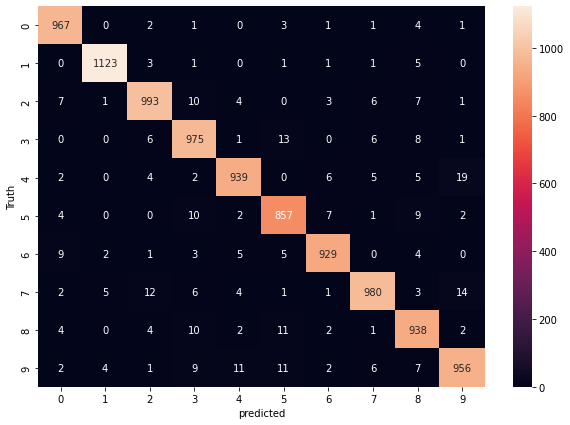

In [450]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')